# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=imperial"

name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed =[]

for city in cities:
    
    try:
        response = requests.get(url + "appid=" + api_key + units + "&q=" + city).json()
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp"])
        wind_speed.append(response["wind"]["speed"])
        print(f"{city} was a success")

    except:
        print("No data")
    
    print("------------")

hammerfest was a success
------------
mataura was a success
------------
hobart was a success
------------
nikolskoye was a success
------------
punta arenas was a success
------------
grindavik was a success
------------
No data
------------
bluff was a success
------------
puerto ayora was a success
------------
atuona was a success
------------
geraldton was a success
------------
lorengau was a success
------------
port lincoln was a success
------------
saint-joseph was a success
------------
kidal was a success
------------
albany was a success
------------
kapaa was a success
------------
vaini was a success
------------
ushuaia was a success
------------
faanui was a success
------------
tyukhtet was a success
------------
fukue was a success
------------
tasiilaq was a success
------------
mar del plata was a success
------------
east london was a success
------------
saint-louis was a success
------------
broken hill was a success
------------
dakar was a success
------------

khash was a success
------------
No data
------------
viransehir was a success
------------
No data
------------
mehamn was a success
------------
port-gentil was a success
------------
sarkand was a success
------------
No data
------------
bathsheba was a success
------------
buin was a success
------------
karaton was a success
------------
ostersund was a success
------------
No data
------------
No data
------------
ahipara was a success
------------
ulety was a success
------------
touros was a success
------------
verkhoyansk was a success
------------
los llanos de aridane was a success
------------
iskateley was a success
------------
viseu was a success
------------
saint-pierre was a success
------------
snezhnogorsk was a success
------------
bilma was a success
------------
teguise was a success
------------
reconquista was a success
------------
zabaykalsk was a success
------------
No data
------------
No data
------------
coruripe was a success
------------
esfahan was 

svetlaya was a success
------------
bubaque was a success
------------
artvin was a success
------------
puerto leguizamo was a success
------------
sarahan was a success
------------
berlevag was a success
------------
marsa matruh was a success
------------
broome was a success
------------
dzheguta was a success
------------
qaqortoq was a success
------------
acapulco was a success
------------
leningradskiy was a success
------------
rawson was a success
------------
khandbari was a success
------------
jashpurnagar was a success
------------
No data
------------
anqing was a success
------------
isangel was a success
------------
ouro preto do oeste was a success
------------
ussel was a success
------------
fuling was a success
------------
luwuk was a success
------------
tazovskiy was a success
------------
huilong was a success
------------
nishihara was a success
------------
kushiro was a success
------------
puerto escondido was a success
------------
nuevitas was a succes

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = {"City": name, "Country": country, "Date": date, "Longitude": lng, "Latitude": lat, "Cloudiness": cloudiness, "Humidity": humidity, "Max Temp": max_temp, "Wind Speed": wind_speed}
weather_data = pd.DataFrame(weather_data)

weather_data.to_csv("Weather Data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Country,Date,Longitude,Latitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Hammerfest,NO,1541447400,23.68,70.66,75,93,47.46,36.91
1,Mataura,NZ,1541450657,168.86,-46.19,0,75,59.54,4.72
2,Hobart,AU,1541449800,147.33,-42.88,75,82,55.40,4.34
3,Nikolskoye,RU,1541448000,30.79,59.70,90,93,35.60,4.47
4,Punta Arenas,CL,1541448000,-70.91,-53.16,40,45,46.40,29.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

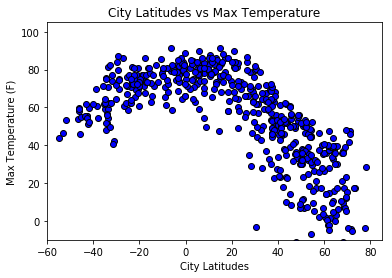

In [7]:
lats = weather_data["Latitude"]
temp = weather_data["Max Temp"]

plt.scatter(lats, temp, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-10, 105)
plt.xlim(-60, 85)

plt.title("City Latitudes vs Max Temperature")
plt.xlabel("City Latitudes")
plt.ylabel("Max Temperature (F)")

plt.show()

#### Latitude vs. Humidity Plot

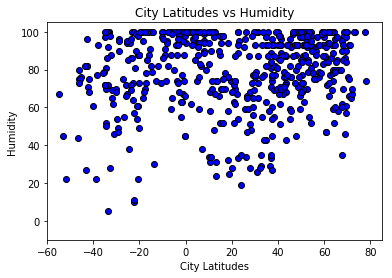

In [8]:
lats = weather_data["Latitude"]
humidity = weather_data["Humidity"]

plt.scatter(lats, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-10, 105)
plt.xlim(-60, 85)

plt.title("City Latitudes vs Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity")

plt.show()

#### Latitude vs. Cloudiness Plot

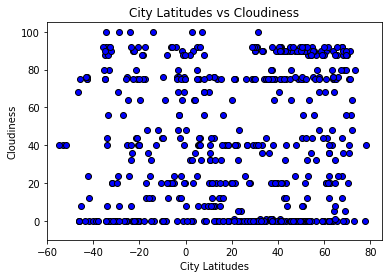

In [9]:
lats = weather_data["Latitude"]
cloudiness = weather_data["Cloudiness"]

plt.scatter(lats, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-10, 105)
plt.xlim(-60, 85)

plt.title("City Latitudes vs Cloudiness")
plt.xlabel("City Latitudes")
plt.ylabel("Cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

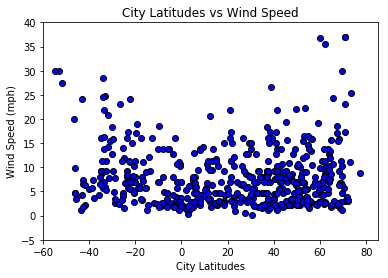

In [11]:
lats = weather_data["Latitude"]
winds = weather_data["Wind Speed"]

plt.scatter(lats, winds, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5, 40)
plt.xlim(-60, 85)

plt.title("City Latitudes vs Wind Speed")
plt.xlabel("City Latitudes")
plt.ylabel("Wind Speed (mph)")

plt.show()